### EDA

- train data has 1460 rows and test with 1459
- 19 features with missing value

In [1]:
#--- import some necessary librairies

import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from scipy.special import boxcox1p,inv_boxcox1p
from scipy.stats import boxcox_normmax,boxcox

from subprocess import check_output
from sklearn.externals import joblib

In [2]:
train = pd.read_csv("/Users/chloe/Google Drive/Kaggle_Data/kaggle_house_price/train.csv")
test = pd.read_csv("/Users/chloe/Google Drive/Kaggle_Data/kaggle_house_price/test.csv")

In [3]:
#--- check the size of the data and drop building_id
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 
The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


### 19 features with missing value

In [4]:
sales_price = train["SalePrice"]
del train["SalePrice"]
all_data = pd.concat([train, test])

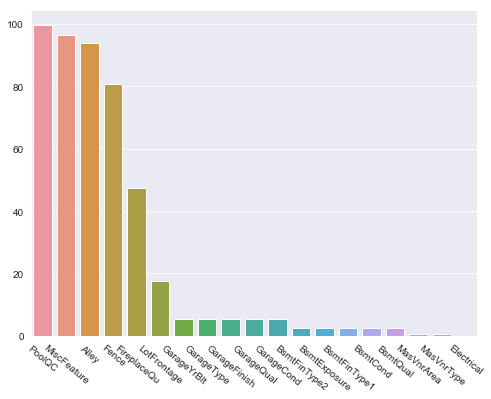

In [5]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False) # drop those no na
len(train_na)

f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='-40')
sns.barplot(x=train_na.index, y=train_na)
plt.show()

In [6]:
# only 7 rows with poolQC -> can change it into another feature -> has_pool
train[pd.notnull(train["PoolQC"])].shape

(7, 79)

### 43 variables need to transform to numerical 

In [7]:
categorical_column = []
for column in train.columns:
    if train[column].dtype=='O':
        categorical_column.append(column)
print("# of categorical variables need to transform: ", len(categorical_column))

# of categorical variables need to transform:  43


In [8]:
train["BldgType"].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

### Some Insights from data

In [9]:
train["SalePrice"] = sales_price 
train["total_area"] = train["GrLivArea"]+train["TotalBsmtSF"]+train["LotArea"]+train["GarageArea"]
train["SalePrice_by_area_size"] = train["SalePrice"]/train["total_area"]
#train[['GrLivArea', 'TotalBsmtSF', 'LotArea', 'MasVnrArea', 'GarageArea', 'PoolArea']]

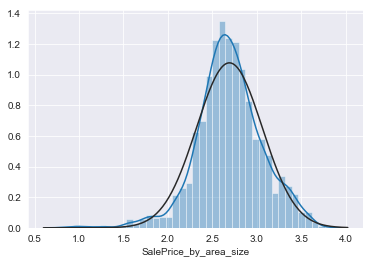

In [10]:
sns.distplot(np.log1p(train["SalePrice_by_area_size"]), fit=norm);

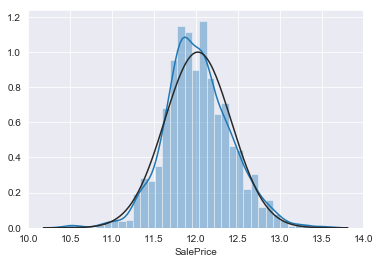

In [11]:
sns.distplot(np.log1p(train["SalePrice"]), fit=norm);

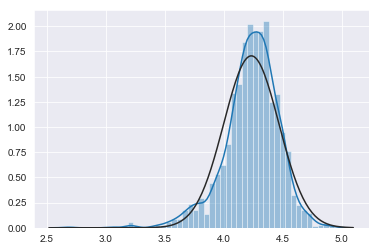

In [13]:
sns.distplot(np.log1p(train["SalePrice"]/(train["GrLivArea"]+train["TotalBsmtSF"])), fit=norm);

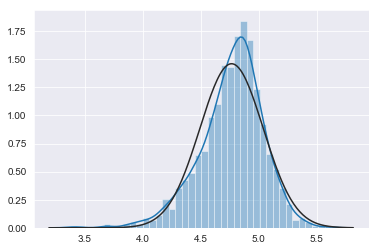

In [14]:
sns.distplot(np.log1p(train["SalePrice"]/(train["GrLivArea"])), fit=norm);

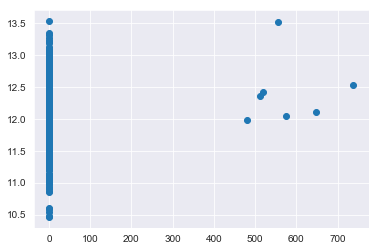

In [87]:
plt.scatter(train["PoolArea"], np.log1p(train["SalePrice"]))
plt.show();

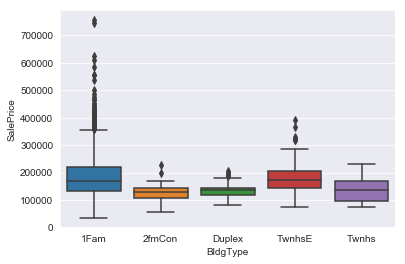

In [88]:
sns.boxplot(x=train["BldgType"], y=train["SalePrice"])

In [92]:
train[["YearBuilt", "YearRemodAdd", "YrSold", "SaleCondition"]].head(5)

,YearBuilt,YearRemodAdd,YrSold,SaleCondition
0,2003,2003,2008,Normal
1,1976,1976,2007,Normal
2,2001,2002,2008,Normal
3,1915,1970,2006,Abnorml
4,2000,2000,2008,Normal
